In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/content/creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57526,47945,1.138100,0.186695,0.224979,1.098891,-0.149107,-0.494817,0.158646,-0.082146,0.031110,...,0.070575,0.193698,-0.093600,0.078039,0.590292,-0.300950,0.021664,0.021820,36.86,0.0
57527,47946,-0.646913,1.130799,1.050571,-0.569363,0.844107,0.227605,0.808902,-0.130225,-0.290188,...,-0.327854,-0.647464,-0.188020,-1.029697,0.014101,0.101051,0.084340,-0.074503,1.98,0.0
57528,47946,1.214047,0.217891,0.399390,0.945208,-0.101512,-0.108244,-0.099976,0.071885,0.248587,...,-0.293180,-0.859018,0.125645,-0.508650,0.253563,-0.629445,0.040633,0.022467,2.99,0.0
57529,47946,-0.637264,1.187105,0.911446,0.827789,-0.241755,-0.431410,0.482341,0.395142,-1.095934,...,0.272207,0.604289,-0.037705,0.339703,-0.250802,-0.350949,0.031500,0.094337,45.00,0.0


In [4]:
df.shape


(57531, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57531 entries, 0 to 57530
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57531 non-null  int64  
 1   V1      57531 non-null  float64
 2   V2      57531 non-null  float64
 3   V3      57531 non-null  float64
 4   V4      57531 non-null  float64
 5   V5      57530 non-null  float64
 6   V6      57530 non-null  float64
 7   V7      57530 non-null  float64
 8   V8      57530 non-null  float64
 9   V9      57530 non-null  float64
 10  V10     57530 non-null  float64
 11  V11     57530 non-null  float64
 12  V12     57530 non-null  float64
 13  V13     57530 non-null  float64
 14  V14     57530 non-null  float64
 15  V15     57530 non-null  float64
 16  V16     57530 non-null  float64
 17  V17     57530 non-null  float64
 18  V18     57530 non-null  float64
 19  V19     57530 non-null  float64
 20  V20     57530 non-null  float64
 21  V21     57530 non-null  float64
 22

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

In [8]:
df = df.dropna(subset=['Class'])

In [9]:
target=df.values[:,-1]

In [10]:
target

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
from collections import Counter

In [12]:
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=57371, Percentage=99.724%
Class=1, Count=159, Percentage=0.276%


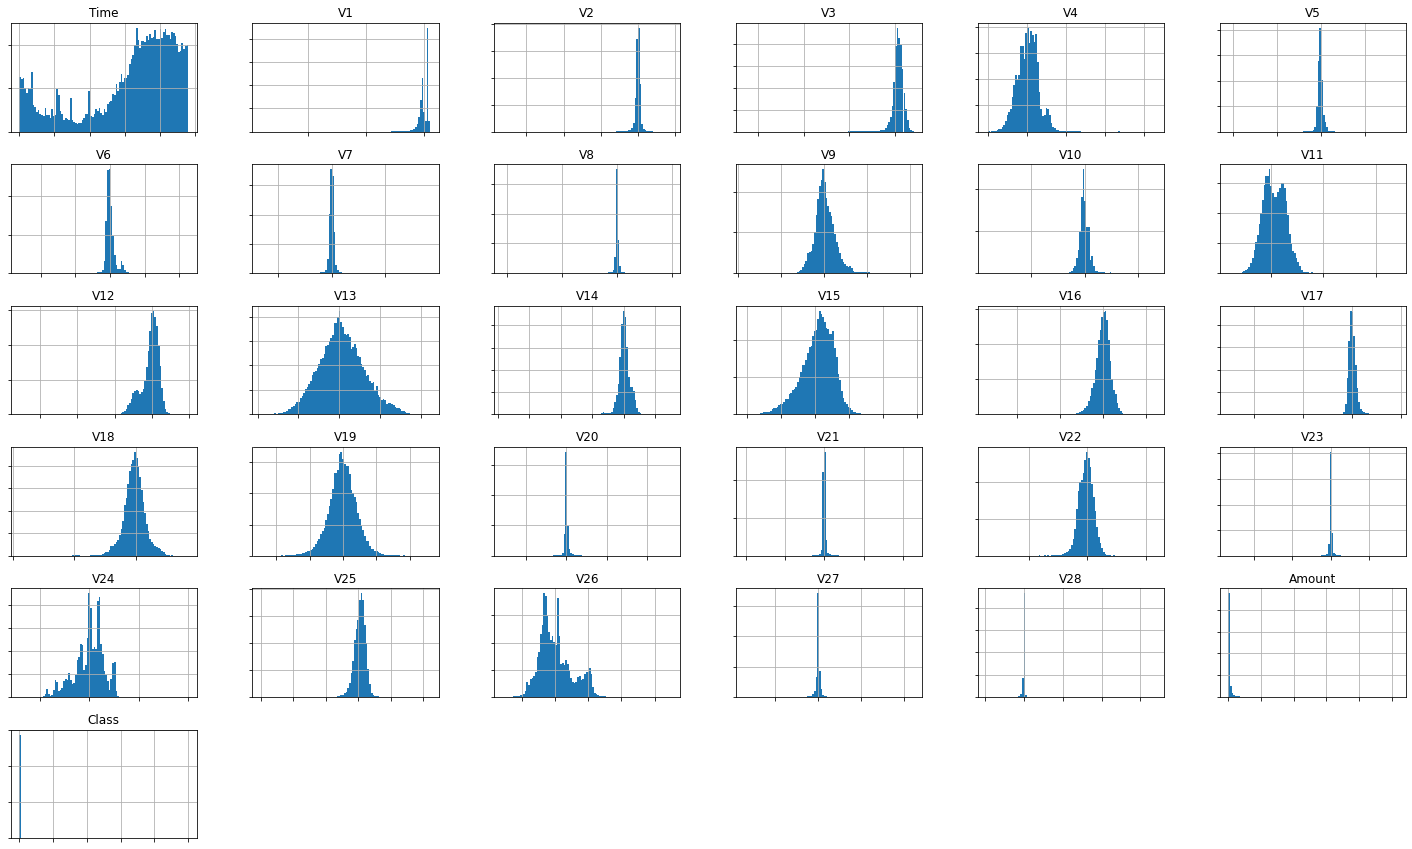

In [13]:
ax = df.hist(bins=100,figsize=(25,15))

for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])

plt.show()

In [14]:
x=df.drop(['Class'],axis=1)

In [15]:
y=df['Class']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [17]:
from imblearn.over_sampling import SMOTE

counter=Counter(y_train)
print('Before',counter)
smt=SMOTE()

X_train_sm,y_train_sm=smt.fit_resample(x_train,y_train)

counter=Counter(y_train_sm)
print('After',counter)

Before Counter({0.0: 40163, 1.0: 108})
After Counter({0.0: 40163, 1.0: 40163})
